#Data Cleaning

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import csv
import urllib
import time

#Air Pollution/Quality Data and Basic Weather Data

Here we must first read in several different csv files, one for each pollutant and one for each weather measurement. There are files from PM2.5_frmfem, PM2.5_no_frmfem, PM10, Air Pressure, Relative Humidity, Dew Point, Temperature, Wind, CO, NO2, SO2, and Ozone.

In [2]:
#Function to get seasonal breadowns. Takes in
#a row from one of these csvs and splits the date
#column converting it to a datetime. It will then
#assign a 'season' depending on the date. For seasons
#we've used Jan-Mar, Apr-June, July-Sept, Oct-Dec.
import datetime
def seasonMaker(rowIn):
    listeddate=[int(x) for x in rowIn.split("-")]
    dateInd = datetime.date(listeddate[0],listeddate[1],listeddate[2])
    if dateInd < datetime.date(2014,4,1):
        return 'Winter'
    elif (dateInd < datetime.date(2014,7,1)) and (dateInd >= datetime.date(2014,4,1)):
        return 'Spring'
    elif (dateInd < datetime.date(2014,10,1)) and (dateInd >= datetime.date(2014,7,1)):
        return 'Summer'
    elif (dateInd <= datetime.date(2014,12,31)) and (dateInd >= datetime.date(2014,10,1)):
        return 'Fall'

In [3]:
#A similar function to the above, but it assigns month rather than season
def monthMaker(rowIn):
    listeddate=[int(x) for x in rowIn.split("-")]
    return listeddate[1]

Starting with PM2.5_frmfem. We need to make our base dataframe first and will use this particular csv to do so. We want to make 2 dataframe, `pollDat_s` and `pollDat_m`. One is aggregated at the seasonal level and one is aggregated at the month level. Daily observations are too variable to get an overall image.

**Read in all files**

In [15]:
#PM2.5_frmfem
pm25_frmfem = pd.read_csv("data/pm2.5frmfem_2014.csv")
pm25_frmfem['season']=pm25.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
pm25_frmfem['month']=pm25.apply(lambda row: monthMaker(row['Date Local']), axis=1)
#PM2.5_no_frmfem
pm25_nofrmfem = pd.read_csv("data/pm2.5_non_frmfem_2014.csv")
pm25_nofrmfem['season']=pm25_nofrmfem.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
pm25_nofrmfem['month']=pm25_nofrmfem.apply(lambda row: monthMaker(row['Date Local']), axis=1)
#PM10
pm10 = pd.read_csv("data/pm10_2014.csv")
pm10['season']=pm10.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
pm10['month']=pm10.apply(lambda row: monthMaker(row['Date Local']), axis=1)
#TEMP
temp = pd.read_csv("data/temp_2014.csv")
temp['season']=temp.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
temp['month']=temp.apply(lambda row: monthMaker(row['Date Local']), axis=1)
#PRESS
press = pd.read_csv("data/press_2014.csv")
press['season']=press.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
press['month']=press.apply(lambda row: monthMaker(row['Date Local']), axis=1)
#RH_DP
rh_dp = pd.read_csv("data/rh_dp_2014.csv")
rh_dp['season']=rh_dp.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
rh_dp['month']=rh_dp.apply(lambda row: monthMaker(row['Date Local']), axis=1)
rh = rh_dp[rh_dp['Parameter Name']=='Relative Humidity ']
dp = rh_dp[rh_dp['Parameter Name']=='Dew Point']
#WIND
wind = pd.read_csv("data/wind_2014.csv")
wind['season']=wind.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
wind['month']=wind.apply(lambda row: monthMaker(row['Date Local']), axis=1)
#CO
co = pd.read_csv("data/co_2014.csv")
co['season']=co.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
co['month']=co.apply(lambda row: monthMaker(row['Date Local']), axis=1)
#NO2
no2 = pd.read_csv("data/no2_2014.csv")
no2['season']=no2.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
no2['month']=no2.apply(lambda row: monthMaker(row['Date Local']), axis=1)
#OZONE
ozone = pd.read_csv("data/ozone_2014.csv")
ozone['season']=ozone.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
ozone['month']=ozone.apply(lambda row: monthMaker(row['Date Local']), axis=1)
#SO2
so2 = pd.read_csv("data/so2_2014.csv")
so2['season']=so2.apply(lambda row: seasonMaker(row['Date Local']), axis=1)
so2['month']=so2.apply(lambda row: monthMaker(row['Date Local']), axis=1)

Get all the possible Core-Based Statistical Areas (CBSA). These are used for census data of all areas connected to a metropolitan area or micropolitan area.

In [38]:
fileList = [pm25_frmfem,pm25_nofrmfem,pm10,temp,press,rh,dp,wind,co,no2,ozone,so2]
uniqueCBSA = np.array([])
for f in fileList:
    uniqueCBSA= np.append(uniqueCBSA,f['CBSA Name'].unique())
uniqueCBSA = set(uniqueCBSA)
print "Number of unique CBSA in all files: "+str(len(uniqueCBSA))

Number of unique CBSA in all files: 536


In [ ]:
for f in fileList:
    if f['']

In [8]:
test = pm25.groupby(['CBSA Name','Local Site Name'])

In [10]:
test.count()

State Code  County Code  Site Num  Parameter Code   POC  Latitude  Longitude  Datum  Parameter Name  Sample Duration  Pollutant Standard  Date Local  Units of Measure  Event Type  Observation Count  Observation Percent  Arithmetic Mean  1st Max Value  1st Max Hour  AQI  Method Code  Method Name  Address  State Name  County Name  City Name  Date of Last Change
CBSA Name                                    Local Site Name                                                                                                                                                                                                                                                                                                                                                                                                              
Aberdeen, SD                                 ON TOP OF THE FIRE STATION #1 ROOF                         118          118       118             118   118       118        118    118             118              118                 118         118               118         118                118                  118              118            118           118  118          118          118      118         118          118        118                  118
Adjuntas, PR                                 Adjuntas                                                    42           42        42              42    42        42         42     42              42               42                  42          42                42          42                 42                   42               42             42            42   42           42           42       42          42           42         42                   42
Adrian, MI                                   6792 RAISIN CENTER HWY, LENAWEE CO.RD.COMM.OWNE...         119          119       119             119   119       119        119    119             119              119                 119         119               119         119                119                  119              119            119           119  119          119          119      119         119          119        119                  119
Akron, OH                                    5 POINTS                                                   118          118       118             118   118       118        118    118             118              118                 118         118               118         118                118                  118              118            118           118  118          118          118      118         118          118        118                  118
                                             EAST_HS                                                    178          178       178             178   178       178        178    178             178              178                 178         178               178         178                178                  178              178            178           178  178          178          178      178         178          178        178                  178
                                             RAVENNA                                                     95           95        95              95    95        95         95     95              95               95                  95          95                95          95                 95                   95               95             95            95   95           95           95       95          95           95         95                   95
Albany, GA                                   Turner Elementary                                         1312         1312      1312            1312  1312      1312       1312   1312            1312             1312                 975        1312              1312        1312               1312                 1312             1312           1312          1312  975          991         1312     1312        1312         131

In [32]:
#Assign season to each observation using the function above


In [33]:
#Groupby identifiers and season
#We also create a month breakdown simultaneously
group = pm25.groupby(['Local Site Name','State Name','County Name','City Name','season'])
group2 = pm25.groupby(['Local Site Name','State Name','County Name','City Name','month'])
#Get mean of the observation
pollDat_s = group.mean()
pollDat_m = group2.mean()
#Pull all the relevant descriptors for the particular city
#along with the observation for PM2.5
pollDat_s['PM25_frmfem']=pollDat_s['Arithmetic Mean']
pollDat_m['PM25_frmfem']=pollDat_m['Arithmetic Mean']
#Get rid of extra stuff we're not interested in
pollDat_s.drop('Observation Count',axis=1,inplace=True)
pollDat_s.drop('Observation Percent',axis=1,inplace=True)
pollDat_s.drop('Arithmetic Mean',axis=1,inplace=True)
pollDat_s.drop('1st Max Value',axis=1,inplace=True)
pollDat_s.drop('1st Max Hour',axis=1,inplace=True)
pollDat_s.drop('AQI',axis=1,inplace=True)
pollDat_s.drop('Method Code',axis=1,inplace=True)
pollDat_s.drop('Parameter Code',axis=1,inplace=True)
pollDat_s.drop('POC',axis=1,inplace=True)
pollDat_m.drop('Observation Count',axis=1,inplace=True)
pollDat_m.drop('Observation Percent',axis=1,inplace=True)
pollDat_m.drop('Arithmetic Mean',axis=1,inplace=True)
pollDat_m.drop('1st Max Value',axis=1,inplace=True)
pollDat_m.drop('1st Max Hour',axis=1,inplace=True)
pollDat_m.drop('AQI',axis=1,inplace=True)
pollDat_m.drop('Method Code',axis=1,inplace=True)
pollDat_m.drop('Parameter Code',axis=1,inplace=True)
pollDat_m.drop('POC',axis=1,inplace=True)

**PM2.5_no_frmfem**

In [34]:
#Using PM2.5_no_frmfem


In [35]:
#Get the seasonal means
group = pm25_nofrmfem.groupby(['Local Site Name','season'])
group2 = pm25_nofrmfem.groupby(['Local Site Name','month'])
intmed = group.mean()
intmed2 = group2.mean()
intmed['PM25_no_frmfem']=intmed['Arithmetic Mean']
intmed=intmed.ix[:,['PM25_no_frmfem']]
intmed2['PM25_no_frmfem']=intmed2['Arithmetic Mean']
intmed2=intmed2.ix[:,['PM25_no_frmfem']]

In [36]:
#Merge with the original data
pollDat_s = pd.merge(pollDat_s.reset_index(),intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_m = pd.merge(pollDat_m.reset_index(),intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()

**PM10**

In [39]:
group = pm10.groupby(['Local Site Name','season'])
group2 = pm10.groupby(['Local Site Name','month'])
intmed = group.mean()
intmed['PM10']=intmed['Arithmetic Mean']
intmed2 = group2.mean()
intmed2['PM10']=intmed2['Arithmetic Mean']
intmed=intmed.ix[:,['PM10']]
intmed2=intmed2.ix[:,['PM10']]
pollDat_s = pd.merge(pollDat_s,intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_s.drop('level_0',axis=1,inplace=True)
pollDat_m = pd.merge(pollDat_m,intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()
pollDat_m.drop('level_0',axis=1,inplace=True)

**Air Pressure**

In [40]:
group = press.groupby(['Local Site Name','season'])
group2 = press.groupby(['Local Site Name','month'])
intmed = group.mean()
intmed['Press']=intmed['Arithmetic Mean']
intmed=intmed.ix[:,['Press']]
pollDat_s = pd.merge(pollDat_s,intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_s.drop('level_0',axis=1,inplace=True)
intmed2 = group2.mean()
intmed2['Press']=intmed2['Arithmetic Mean']
intmed2=intmed2.ix[:,['Press']]
pollDat_m = pd.merge(pollDat_m,intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()
pollDat_m.drop('level_0',axis=1,inplace=True)

**Temperature**

In [41]:
group = temp.groupby(['Local Site Name','season'])
intmed = group.mean()
intmed['Temp']=intmed['Arithmetic Mean']
intmed=intmed.ix[:,['Temp']]
pollDat_s = pd.merge(pollDat_s,intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_s.drop('level_0',axis=1,inplace=True)
group2 = temp.groupby(['Local Site Name','month'])
intmed2 = group2.mean()
intmed2['Temp']=intmed2['Arithmetic Mean']
intmed2=intmed2.ix[:,['Temp']]
pollDat_m = pd.merge(pollDat_m,intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()
pollDat_m.drop('level_0',axis=1,inplace=True)

**Relative Humidity and Dewpoint**

In [44]:
group = rh.groupby(['Local Site Name','season'])
intmed = group.mean()
intmed['RH']=intmed['Arithmetic Mean']
intmed=intmed.ix[:,['RH']]
pollDat_s = pd.merge(pollDat_s,intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_s.drop('level_0',axis=1,inplace=True)
group2 = rh.groupby(['Local Site Name','month'])
intmed2 = group2.mean()
intmed2['RH']=intmed2['Arithmetic Mean']
intmed2=intmed2.ix[:,['RH']]
pollDat_m = pd.merge(pollDat_m,intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()
pollDat_m.drop('level_0',axis=1,inplace=True)

In [45]:
group = dp.groupby(['Local Site Name','season'])
intmed = group.mean()
intmed['DP']=intmed['Arithmetic Mean']
intmed=intmed.ix[:,['DP']]
pollDat_s = pd.merge(pollDat_s,intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_s.drop('level_0',axis=1,inplace=True)
group2 = dp.groupby(['Local Site Name','month'])
intmed2 = group2.mean()
intmed2['DP']=intmed2['Arithmetic Mean']
intmed2=intmed2.ix[:,['DP']]
pollDat_m = pd.merge(pollDat_m,intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()
pollDat_m.drop('level_0',axis=1,inplace=True)

**Wind**

In [46]:
group = wind.groupby(['Local Site Name','season'])
intmed = group.mean()
intmed['Wind']=intmed['Arithmetic Mean']
intmed=intmed.ix[:,['Wind']]
pollDat_s = pd.merge(pollDat_s,intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_s.drop('level_0',axis=1,inplace=True)
group2 = wind.groupby(['Local Site Name','month'])
intmed2 = group2.mean()
intmed2['Wind']=intmed2['Arithmetic Mean']
intmed2=intmed2.ix[:,['Wind']]
pollDat_m = pd.merge(pollDat_m,intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()
pollDat_m.drop('level_0',axis=1,inplace=True)

**CO**

In [47]:
group = co.groupby(['Local Site Name','season'])
intmed = group.mean()
intmed['CO']=intmed['Arithmetic Mean']
intmed=intmed.ix[:,['CO']]
pollDat_s = pd.merge(pollDat_s,intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_s.drop('level_0',axis=1,inplace=True)
group2 = co.groupby(['Local Site Name','month'])
intmed2 = group2.mean()
intmed2['CO']=intmed2['Arithmetic Mean']
intmed2=intmed2.ix[:,['CO']]
pollDat_m = pd.merge(pollDat_m,intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()
pollDat_m.drop('level_0',axis=1,inplace=True)

**NO2**

In [48]:
group = no2.groupby(['Local Site Name','season'])
intmed = group.mean()
intmed['NO2']=intmed['Arithmetic Mean']
intmed=intmed.ix[:,['NO2']]
pollDat_s = pd.merge(pollDat_s,intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_s.drop('level_0',axis=1,inplace=True)
group2 = no2.groupby(['Local Site Name','month'])
intmed2 = group2.mean()
intmed2['NO2']=intmed2['Arithmetic Mean']
intmed2=intmed2.ix[:,['NO2']]
pollDat_m = pd.merge(pollDat_m,intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()
pollDat_m.drop('level_0',axis=1,inplace=True)

**Ozone**

In [49]:
group = ozone.groupby(['Local Site Name','season'])
intmed = group.mean()
intmed['Ozone']=intmed['Arithmetic Mean']
intmed=intmed.ix[:,['Ozone']]
pollDat_s = pd.merge(pollDat_s,intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_s.drop('level_0',axis=1,inplace=True)
group2 = ozone.groupby(['Local Site Name','month'])
intmed2 = group2.mean()
intmed2['Ozone']=intmed2['Arithmetic Mean']
intmed2=intmed2.ix[:,['Ozone']]
pollDat_m = pd.merge(pollDat_m,intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()
pollDat_m.drop('level_0',axis=1,inplace=True)

**SO2**

In [50]:
group = so2.groupby(['Local Site Name','season'])
intmed = group.mean()
intmed['SO2']=intmed['Arithmetic Mean']
intmed=intmed.ix[:,['SO2']]
pollDat_s = pd.merge(pollDat_s,intmed.reset_index(),on=['Local Site Name','season'],how='outer').reset_index()
pollDat_s.drop('level_0',axis=1,inplace=True)
group2 = so2.groupby(['Local Site Name','month'])
intmed2 = group2.mean()
intmed2['SO2']=intmed2['Arithmetic Mean']
intmed2=intmed2.ix[:,['SO2']]
pollDat_m = pd.merge(pollDat_m,intmed2.reset_index(),on=['Local Site Name','month'],how='outer').reset_index()
pollDat_m.drop('level_0',axis=1,inplace=True)

No we have all the pollutant data into two dataframes, one broken down by season, `pollDat_s` and one broken down by month `pollDat_m`. We check the file and notice that there are many NaNs as some cities don't have all types of observations for each city. We will have to think carefully about how to deal with these missing values in downstream analysis.

In [53]:
pollDat_s.head(6)

,index,Local Site Name,State Name,County Name,City Name,season,State Code,County Code,Site Num,Latitude,Longitude,month,PM25_frmfem,PM25_no_frmfem,PM10,Press,Temp,RH,DP,Wind,CO,NO2,Ozone,SO2
0,0,"DAVID TURNHAM ELEMENTARY SCHOOL, Corner of Du...",Indiana,Spencer,Dale,Fall,18,147,9,38.167523,-86.983214,11.032258,8.867742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"DAVID TURNHAM ELEMENTARY SCHOOL, Corner of Du...",Indiana,Spencer,Dale,Spring,18,147,9,38.167523,-86.983214,4.965517,9.279310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"DAVID TURNHAM ELEMENTARY SCHOOL, Corner of Du...",Indiana,Spencer,Dale,Summer,18,147,9,38.167523,-86.983214,7.967742,12.970968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"DAVID TURNHAM ELEMENTARY SCHOOL, Corner of Du...",Indiana,Spencer,Dale,Winter,18,147,9,38.167523,-86.983214,2.000000,11.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,FRANCIS SCHOOL East Providence,Rhode Island,Providence,East Providence,Fall,44,7,1010,41.841573,-71.360770,10.992509,6.052700,NaN,NaN,1011.878623,45.550666,73.482554,NaN,97.687185,0.253064,8.438933,0.021789,0.417302
5,5,FRANCIS SCHOOL East Providence,Rhode Island,Providence,East Providence,Spring,44,7,1010,41.841573,-71.360770,5.000000,5.345889,5.937931,NaN,1012.363553,59.151616,64.429746,NaN,93.208746,0.188207,4.475064,0.035278,0.270632


In [54]:
pollDat_m.head(6)

,index,Local Site Name,State Name,County Name,City Name,month,State Code,County Code,Site Num,Latitude,Longitude,PM25_frmfem,PM25_no_frmfem,PM10,Press,Temp,RH,DP,Wind,CO,NO2,Ozone,SO2
0,0,"DAVID TURNHAM ELEMENTARY SCHOOL, Corner of Du...",Indiana,Spencer,Dale,1,18,147,9,38.167523,-86.983214,8.340000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"DAVID TURNHAM ELEMENTARY SCHOOL, Corner of Du...",Indiana,Spencer,Dale,2,18,147,9,38.167523,-86.983214,15.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"DAVID TURNHAM ELEMENTARY SCHOOL, Corner of Du...",Indiana,Spencer,Dale,3,18,147,9,38.167523,-86.983214,12.340000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"DAVID TURNHAM ELEMENTARY SCHOOL, Corner of Du...",Indiana,Spencer,Dale,4,18,147,9,38.167523,-86.983214,7.590000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"DAVID TURNHAM ELEMENTARY SCHOOL, Corner of Du...",Indiana,Spencer,Dale,5,18,147,9,38.167523,-86.983214,9.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,"DAVID TURNHAM ELEMENTARY SCHOOL, Corner of Du...",Indiana,Spencer,Dale,6,18,147,9,38.167523,-86.983214,10.933333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we want to do some basic descriptive exploration of the data in each season to look for any overall seasonal trends. We need to break out the data into just the columns of interest and then subset the data into 4 different datasets, one for each season.

In [69]:
seasonalPlot=pollDat_s.ix[:,['Local Site Name','State Name','County Name','City Name','season','State Code','County Code','Site Num','Latitude','Longitude','PM25_frmfem','PM25_no_frmfem','PM10','CO','NO2','SO2','Ozone','Press','Temp','RH','DP','Wind']]

In [56]:
summer_test=seasonalPlot[seasonalPlot.season=='Summer']
winter_test=seasonalPlot[seasonalPlot.season=='Winter']
spring_test=seasonalPlot[seasonalPlot.season=='Spring']
fall_test=seasonalPlot[seasonalPlot.season=='Fall']

Let's check the number of cities we have data for in each season.

In [57]:
print "Number of summer cities: " + str(summer_test.shape[0])
print "Number of winter cities: " + str(winter_test.shape[0])
print "Number of fall cities: " + str(fall_test.shape[0])
print "Number of spring cities: " + str(spring_test.shape[0])

Number of summer cities: 2077
Number of winter cities: 2031
Number of fall cities: 1990
Number of spring cities: 2072


As a preliminary exploratory analysis, we can simply see how the mean values of each of the pollutants and weather variables changes over the years. Presumably this should match what other research has shown. We have to assume that there isn't a huge regional difference here which may or may not actually be reasonable given that we know certain cities have different effects. This is just a cursory look.

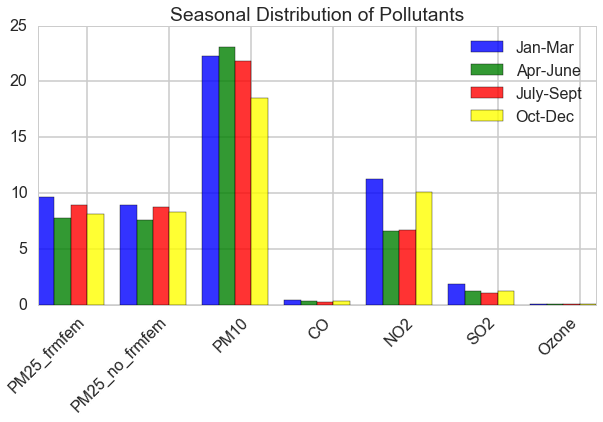

In [67]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6),tight_layout=True)
plt.figure(figsize=(10,5))
winterbar=plt.bar(range(len(winter_test.mean()))[5:12],winter_test.mean().values[5:12],width=.2,color='blue',alpha=.8)
plt.xticks(range(len(winter_test.mean()))[5:12],winter_test.mean().index[5:12],rotation=45,ha='right')
springbar=plt.bar([x+.2 for x in range(len(spring_test.mean()))[5:12]],spring_test.mean().values[5:12],width=.2,color='green',alpha=.8)
plt.xticks([x+.2 for x in range(len(spring_test.mean()))[5:12]],spring_test.mean().index[5:12],rotation=45,ha='right')
summerbar=plt.bar([x+.4 for x in range(len(summer_test.mean()))[5:12]],summer_test.mean().values[5:12],width=.2,color='red',alpha=.8)
plt.xticks([x+.4 for x in range(len(summer_test.mean()))[5:12]],summer_test.mean().index[5:12],rotation=45,ha='right')
fallbar=plt.bar([x+.6 for x in range(len(fall_test.mean()))[5:12]],fall_test.mean().values[5:12],width=.2,color='yellow',alpha=.8)
plt.xticks([x+.6 for x in range(len(fall_test.mean()))[5:12]],fall_test.mean().index[5:12],rotation=45,ha='right')
plt.legend((winterbar,springbar,summerbar,fallbar),('Jan-Mar','Apr-June','July-Sept','Oct-Dec'))
plt.title("Seasonal Distribution of Pollutants")

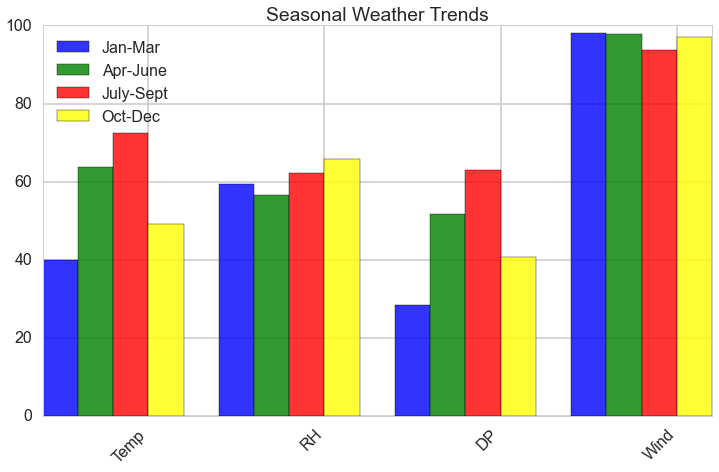

In [68]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6),tight_layout=True)
plt.figure(figsize=(12,7))
winterbar=plt.bar(range(len(winter_test.mean()))[13:18],winter_test.mean().values[13:18],width=.2,color='blue',alpha=.8)
plt.xticks(range(len(winter_test.mean()))[13:18],winter_test.mean().index[13:18],rotation=45,ha='right')
springbar=plt.bar([x+.2 for x in range(len(spring_test.mean()))[13:18]],spring_test.mean().values[13:18],width=.2,color='green',alpha=.8)
plt.xticks([x+.2 for x in range(len(spring_test.mean()))[13:18]],spring_test.mean().index[13:18],rotation=45,ha='right')
summerbar=plt.bar([x+.4 for x in range(len(summer_test.mean()))[13:18]],summer_test.mean().values[13:18],width=.2,color='red',alpha=.8)
plt.xticks([x+.4 for x in range(len(summer_test.mean()))[13:18]],summer_test.mean().index[13:18],rotation=45,ha='right')
fallbar=plt.bar([x+.6 for x in range(len(fall_test.mean()))[13:18]],fall_test.mean().values[13:18],width=.2,color='yellow',alpha=.8)
plt.xticks([x+.6 for x in range(len(fall_test.mean()))[13:18]],fall_test.mean().index[13:18],rotation=45,ha='right')
plt.legend((winterbar,springbar,summerbar,fallbar),('Jan-Mar','Apr-June','July-Sept','Oct-Dec'),loc='upper left')
plt.title('Seasonal Weather Trends')

We can also look at average changes in pollutants and weather over a monthly basis.

In [70]:
monthlyPlot=pollDat_m.ix[:,['Local Site Name','State Name','County Name','City Name','month','State Code','County Code','Site Num','Latitude','Longitude','PM25_frmfem','PM25_no_frmfem','PM10','CO','NO2','SO2','Ozone','Press','Temp','RH','DP','Wind']]

In [75]:
group = monthlyPlot.groupby('month')
plotVals = group.mean()

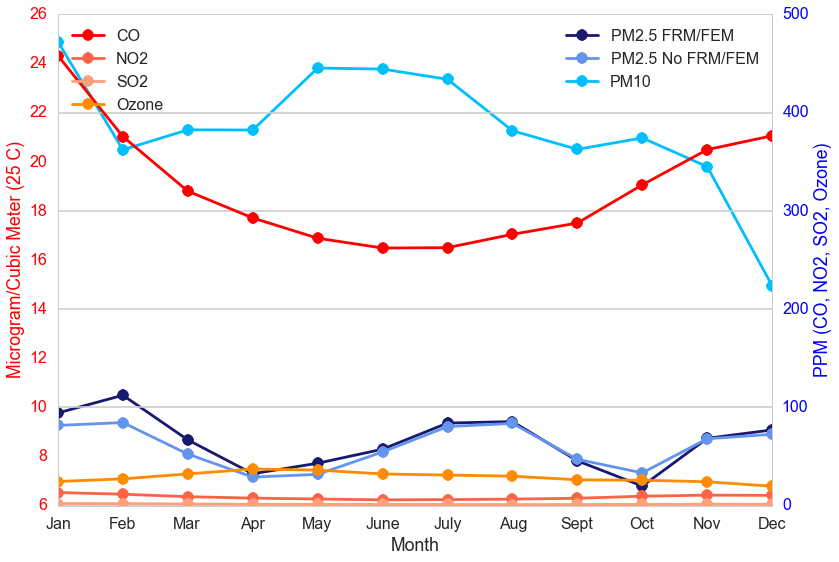

In [141]:
#Help from http://matplotlib.org/examples/api/two_scales.html for duel axis
#and coloring of axis labels
#Help from http://stackoverflow.com/questions/6682784/how-to-reduce-number-of-ticks-with-matplotlib
#to set axis ticks

colors = ["#191970", "#6495ed", "#00bfff"]
with sns.color_palette(colors):
    fig, ax1 = plt.subplots()
    plt.locator_params(nbins=12)
    plt.grid(False)
    ax1.plot(plotVals.PM25_frmfem,'o-',label='PM2.5 FRM/FEM')
    ax1.set_xticklabels(('Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'))
    ax1.set_xlabel('Month')
    ax1.plot(plotVals.PM25_no_frmfem,'o-',label='PM2.5 No FRM/FEM')
    ax1.plot(plotVals.PM10,'o-',label='PM10')
    for tl in ax1.get_yticklabels():
        tl.set_color('r')
    ax1.set_ylabel("Microgram/Cubic Meter (25 C)",color='r')
    ax1.legend(loc='upper right')

colors = ["#ff0000", "#ff6347", "#ffa07a",'#ff8c00']
with sns.color_palette(colors):
    ax2=ax1.twinx()
    co=ax2.plot(plotVals.CO*1000,'o-',label='CO')
    no2=ax2.plot(plotVals.NO2,'o-',label='NO2')
    so2=ax2.plot(plotVals.SO2,'o-',label='SO2')
    ozone=ax2.plot(plotVals.Ozone*1000,'o-',label='Ozone')
    ax2.set_ylabel('PPM (CO, NO2, SO2, Ozone)', color='b')
    for tl in ax2.get_yticklabels():
        tl.set_color('b')
    legend = ax2.legend(loc='upper left')
plt.show()


In [ ]:
"Temp (degree F); RH (% RH); DP (degree F); \nWind (knots); Pressure (Millibars)"

In [ ]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6),tight_layout=True)
plt.figure(figsize=(10,5))


#Hierarchical Clustering

In [43]:
summer_test=summer_test
df1= summer_test.ix[:,['PM25_frmfem','PM10','CO','SO2','NO2','Ozone']]
df1= df1.dropna(axis=0)

In [44]:
df1.shape

(55, 6)

In [47]:
#Code from https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
import scipy.cluster.hierarchy as hac
df1= summer_test.ix[:,['PM25_frmfem','CO','SO2','NO2','Ozone']].dropna(axis=0)
X = np.array(df1)
Z = hac.linkage(X, 'average')

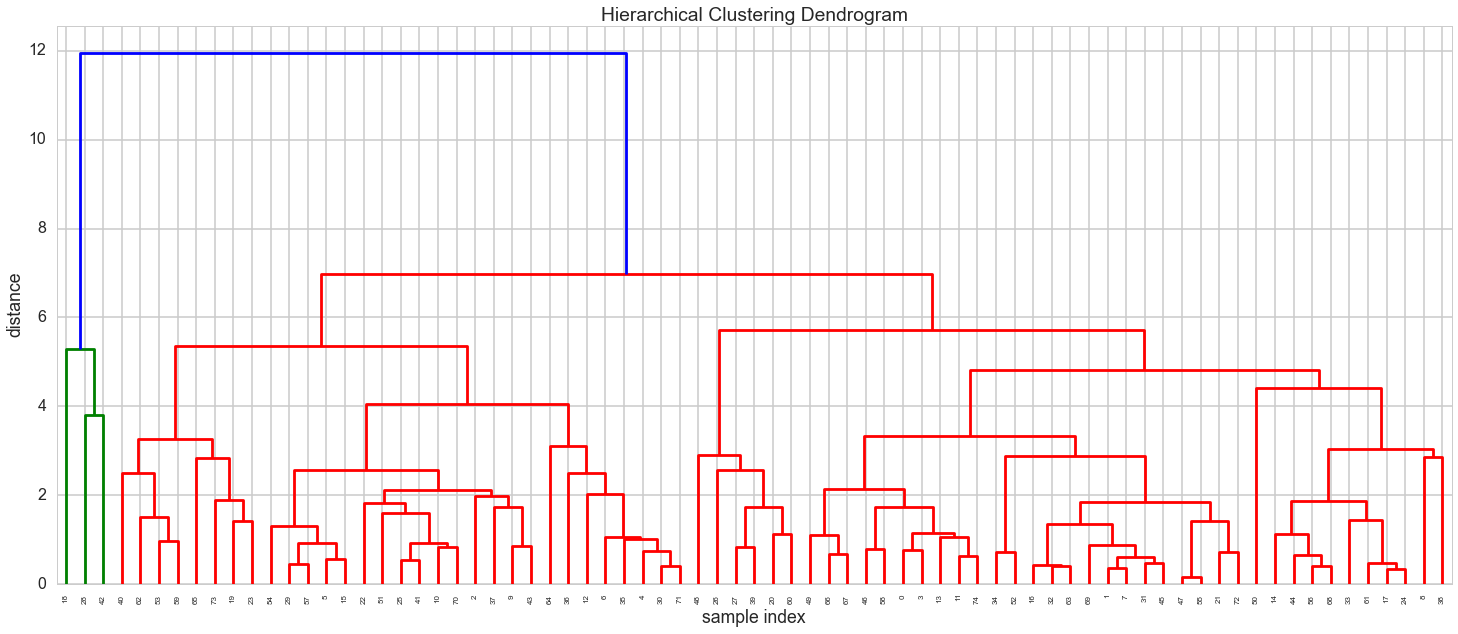

In [48]:
#Code from https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [52]:
test.shape

(147, 3)